# EDA

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import textwrap as wrap


train = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/train.csv')
val = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/val.csv')
test = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/test.csv')

In [92]:
train.head()

,posting_id,image,image_phash,title,label_group
0,train_2249428809,40d304f91be807fed3b796a158a034f7.jpg,bc69d33e86b491c1,AMTECH Klem C Set 3 Pcs - Catok Clamp 1 2 3 Inch,3685949317
1,train_1453612941,e05aa71652e2546dbc2a6a2d18cc4aa7.jpg,bcfcc1a80ee930da,Cetakan Kue Pukis 10 Lubang Pancong Teflon Ran...,2236232282
2,train_414717665,0c0f97f726132be83c7b84e0ca9e604e.jpg,bc4aa5a5de34d2e0,(COD)TAS TOTE BAG T76 TAS CANVAS FASHION WANIT...,3145779110
3,train_404098311,fedf1394058d6e439698356c0be6f4d6.jpg,cbceb1a14e8bf046,(1kg=7pcs) MEIRA CARDIGAN CARDI OUTHER TANPA J...,4171236554
4,train_653040440,cfb08184ebbef7a5409e1bd1a0f6d0d9.jpg,c44eec61e516d2b9,Wardah Lightening Day Cream 30gr or night cre...,1774190279


In [93]:
train.shape

(21920, 5)

In [94]:
unique_labels = train['label_group'].unique()
len(unique_labels)

10019

In [95]:
# how many images in total
train["image"].nunique()

21082

In [96]:
train.groupby('label_group').count().sort_values(by='posting_id', ascending=False)

,posting_id,image,image_phash,title
label_group,,,,
159351600,41,41,41,41
1141798720,40,40,40,40
562358068,34,34,34,34
3627744656,32,32,32,32
3113678103,32,32,32,32
...,...,...,...,...
2837668850,1,1,1,1
2837888168,1,1,1,1
2838027152,1,1,1,1


In [97]:
# check title length range by word
train['title'].str.split().apply(lambda x: len(x)).describe()

count    21920.000000
mean         9.427920
std          4.470647
min          1.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         61.000000
Name: title, dtype: float64

In [98]:
title_unique = train['title'].nunique()
title_unique

21443

In [99]:
# check the id count
posting_unique = train['posting_id'].nunique()
posting_unique

21920

In [100]:
title_unique/posting_unique

0.9782390510948905

In [101]:
len(train['posting_id'])

21920

In [102]:
train["image_phash"].nunique() / len(train["image_phash"])

0.8786952554744526

In [103]:
# check the distribution of the number of images in each group
group_img_dist = train.groupby('label_group').count().sort_values(by='posting_id', ascending=False)['posting_id'].value_counts()


In [104]:
# change group_img_dist to dataframe
group_img_dist = pd.DataFrame(group_img_dist)
group_img_dist.head()

,posting_id
2,4055
1,3811
3,1065
4,455
5,212


In [105]:
# for group_img_dist, combine 1 to 3, and sum the posting_id count
img_count_1_3 = group_img_dist.loc[1:3].sum()
img_count_4_10 = group_img_dist.loc[4:10].sum()
img_count_11_more = group_img_dist.loc[11:].sum()

In [106]:
img_dist = [img_count_1_3, img_count_4_10, img_count_11_more]

In [107]:
img_dist = pd.DataFrame(img_dist)

In [108]:
# insert first column to img_dist as "image_count" and set the value to "Less than 3 images", "4 to 10 images", "11 and more images"
img_dist.insert(0, "image_count", ["Less than 3 images", "4 to 10 images", "11 and more images"], True)

# rename the column name
img_dist.rename(columns={0: "count"}, inplace=True)

# reset the index
img_dist.reset_index(drop=True, inplace=True)

In [109]:
img_dist

,image_count,posting_id
0,Less than 3 images,4876
1,4 to 10 images,1013
2,11 and more images,113


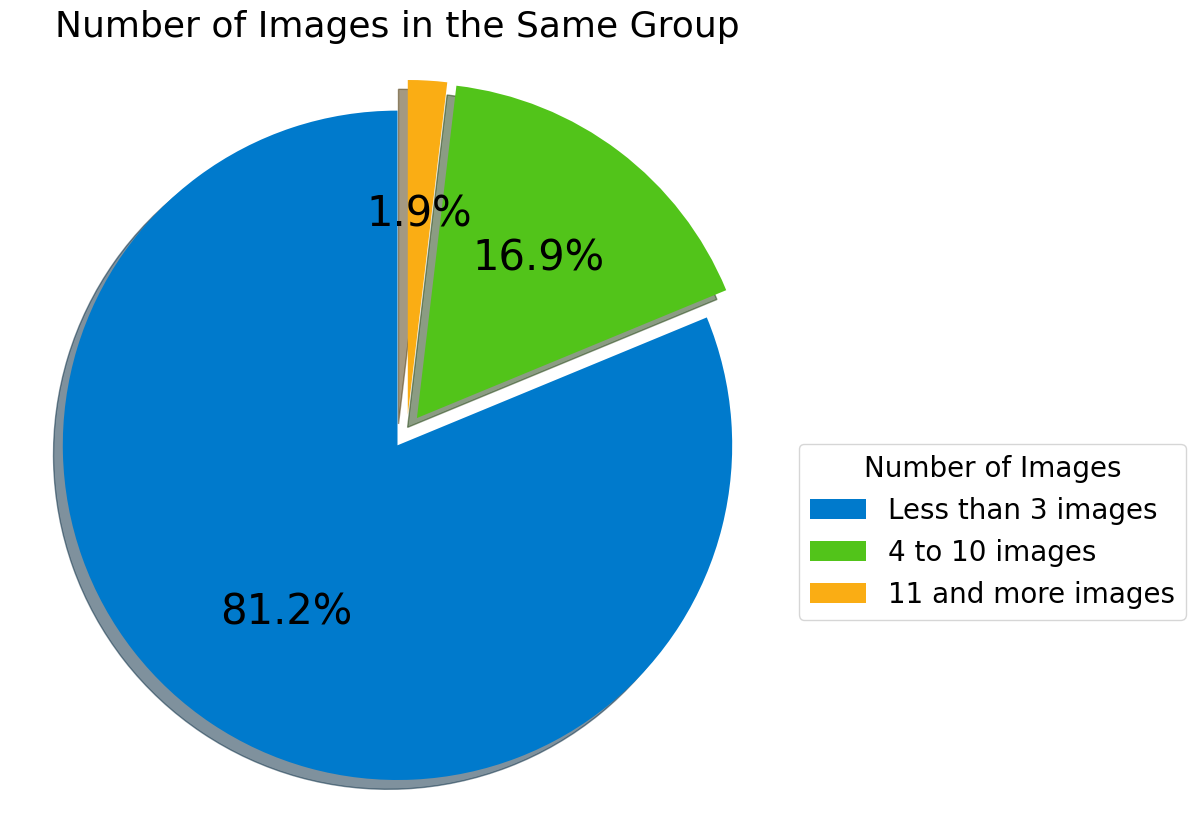

In [110]:
# plot the pie chart
plt.figure(figsize=(10,10))
explode = [0.05]*len(img_dist) # add a slight separation between pie slices
colors = ['#007acc', '#52c41a', '#faad14', '#f5222d'] # custom color palette
plt.pie(img_dist['posting_id'], labels=None, autopct='%.1f%%',textprops={'fontsize': 30}, shadow=True, startangle=90, explode=explode, colors=colors)
plt.legend(labels=img_dist['image_count'], title='Number of Images', title_fontsize=20, loc="best", bbox_to_anchor=(1, 0.5), fontsize=20)
plt.title('Number of Images in the Same Group', fontsize=26)
plt.axis('equal')
plt.show()




In [111]:
PATH_TO_IMG = '/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/train_images/'

In [112]:
def show_same_img():
    # choose randomly two instances per each class
    labels_to_show = np.random.choice(train.label_group.unique(), 
                                      replace=True, size=27)
    img_to_show = []
    for label in labels_to_show:
        rows = train[train.label_group==label].copy()
        pair = np.random.choice([i for i in range(len(rows))], 
                                    replace=True, size=2)
        img_pair = rows.iloc[pair][['image', 'title']].values
        
        img_to_show += list(img_pair)
    
    fig, axes = plt.subplots(figsize = (18, 12), nrows=2,ncols=2)
    for imp, ax in zip(img_to_show, axes.ravel()):
        img = cv2.imread(PATH_TO_IMG + imp[0])
        title = '\n'.join(wrap(imp[1], 20))
        ax.set_title(title)
        ax.imshow(img)
        ax.axis('off')

    fig.tight_layout()